In [1]:

import os

import numpy as np
import pandas as pd




In [2]:

all_pick_paths = [os.path.join(f'../data/picks/{ext}') for ext in os.listdir('../data/picks')]
all_picks = pd.concat([pd.read_csv(pick_df) for pick_df in all_pick_paths], axis=0).reset_index(drop=True)

all_picks['name'] = all_picks['name'].replace('Hersch','Hersh')

print(all_pick_paths)
expert_or_big_brain = {
    'Derosa':1,
    'McGee':1,
    'Peck':1,
    'SWEEP':1,
    'DRF Consensus':1,
    'Fat Bald Guy':1,
    'Joe K':1,
    'Elbadwi':1,
    'Hersh':1,
    'Somich':1,
    'Plonk':1,
    'Paddock Puss':1,
    'Churchill Insider':1,
    'Capper Sheet':1,
    'Swift':1,
    'JK':1,
    
    
    'Jason O':0,
    'Goaty':0,
    'Blake':0,
    'Holmes':0,
    'Quincy':0,
    'Marty':0,
    'Kyle':0,
    'Kelsch':0,
    'Duke':0,
    'Jones':0,
    'Burly':0,
    'Brad Ginsburg':0
}

all_picks['expert'] = all_picks['name'].copy().map(expert_or_big_brain)


['../data/picks/churchill-downs_2023-04-29.csv', '../data/picks/churchill-downs_2023-05-02.csv', '../data/picks/churchill-downs_2023-05-03.csv', '../data/picks/churchill-downs_2023-05-04.csv', '../data/picks/churchill-downs_2023-05-05.csv', '../data/picks/churchill-downs_2023-05-06.csv', '../data/picks/keeneland_2023-04-21.csv', '../data/picks/keeneland_2023-04-22.csv', '../data/picks/keeneland_2023-04-23.csv', '../data/picks/keeneland_2023-04-26.csv', '../data/picks/keeneland_2023-04-27.csv', '../data/picks/keeneland_2023-04-28.csv']


In [3]:

all_result_paths = [os.path.join(f'../data/entries/{ext}') for ext in os.listdir('../data/entries')]
all_results = pd.concat([pd.read_csv(result_df) for result_df in all_result_paths], axis=0).reset_index(drop=True)


In [4]:
all_result_paths

['../data/entries/churchill-downs_2023-04-29.csv',
 '../data/entries/churchill-downs_2023-05-02.csv',
 '../data/entries/churchill-downs_2023-05-03.csv',
 '../data/entries/churchill-downs_2023-05-04.csv',
 '../data/entries/churchill-downs_2023-05-05.csv',
 '../data/entries/churchill-downs_2023-05-06.csv',
 '../data/entries/keeneland_2023-04-21.csv',
 '../data/entries/keeneland_2023-04-22.csv',
 '../data/entries/keeneland_2023-04-23.csv',
 '../data/entries/keeneland_2023-04-26.csv',
 '../data/entries/keeneland_2023-04-27.csv',
 '../data/entries/keeneland_2023-04-28.csv']

In [5]:

wagers = {
    'Best':250,
    'Top':150,
    'A':100,
    'B':50
}


In [6]:
weights = {
    'Hersh':2.5,
    'JK':2.25,
    'Somich':2,
    'Swift':1.75,
    'Joe K':1.5,
    'Fat Bald Guy':1.5,
    'Churchill Insider':1.25,
    'Derosa':1.25,
    'DRF Consensus':0.75,
    'Peck':0.75,
    'McGee':0.5,
    'SWEEP':0.5,
    'Elbadwi':0.25,
    'Plonk':0,
    'Paddock Puss':0,
    'Capper Sheet':0,
    
    'Kyle':2.75,
    'Jason O':2.25,
    'Holmes':2,
    'Blake':2,
    'Goaty':1,
    'Kelsch':0.75,
    'Jones':0.75,
    'Quincy':0.75,
    'Marty':0.75,
    'Duke':0.75,
    'Burly':0.75,
    'Brad Ginsburg':0
}


In [7]:
all_picks['weight'] = all_picks['name'].map(weights)
all_picks['mod_wager'] = all_picks['wager'].copy()*all_picks['weight'].copy()


In [8]:

winners = all_results.copy().loc[all_results['finish']==1][['track','date','race','horse','win_paid']]
for col in ['win_paid']:#,'place_paid','show_paid']:
    winners[col] = winners[col].replace('[\$,]', '', regex=True).astype(float)
    
all_picks=all_picks.merge(winners, how='left', on=['track','date','race','horse'])
all_picks['win_paid'] = all_picks['win_paid'].fillna(0)

all_picks['return'] = (all_picks['win_paid'].copy()-2)* (all_picks['wager'].copy()/2)
all_picks['winner'] = np.where(all_picks['win_paid'].copy()>0, 1, 0)


In [9]:

winners = all_picks.copy().groupby(['name'])['winner'].sum()*10
winners = winners.reset_index()
picks = all_picks.copy().groupby(['name'])['wager'].sum()/100
picks = picks.reset_index()
winners = winners.merge(picks, how='left', on='name')
winners['WinPerPick'] = winners['winner'].copy()/winners['wager'].copy()


In [10]:

num_races = all_picks.copy().groupby(['track','date','name'])['race'].nunique().reset_index()
num_races = num_races.groupby(['name'])['race'].sum().reset_index()
num_races = num_races.rename(columns={'race':'num_races'})
# num_races

In [11]:

invested = all_picks.copy().groupby(['name'])['wager'].sum().reset_index()
bet_return = all_picks.copy().groupby(['name'])['return'].sum().reset_index()
invested = invested.rename(columns={'wager':'invested'})
summary = invested.merge(bet_return, how='left', on=['name'])
summary['ROI'] = summary['return'].copy()/summary['invested'].copy()
summary['$2_return'] = summary['invested'].copy()+summary['return'].copy()
summary['$2_return'] = (summary['$2_return'].copy()/summary['invested'].copy())*2
summary = summary.merge(winners[['name','WinPerPick']], how='left', on=['name'])
summary = summary.merge(num_races, how='left', on=['name'])
summary['expert'] = summary['name'].copy().map(expert_or_big_brain)
summary['name'] = summary['name'].str.replace('Jones','Smarty Jones')
summary.sort_values(by=['$2_return','WinPerPick'], ascending=[False,False])


,name,invested,return,ROI,$2_return,WinPerPick,num_races,expert
26,Somich,12750,3249.5,0.254863,2.509725,2.039216,32,1
7,Duke,7200,386.5,0.053681,2.107361,1.805556,20,0
18,Kyle,7350,-488.5,-0.066463,1.867075,2.040816,21,0
15,Joe K,17200,-1361.0,-0.079128,1.841744,1.918605,56,1
14,Jason O,35100,-3373.0,-0.096097,1.807806,1.851852,80,0
12,Holmes,25050,-2948.5,-0.117705,1.764591,1.956088,67,0
0,Blake,29750,-4094.0,-0.137613,1.724773,2.016807,81,0
9,Fat Bald Guy,30050,-4649.0,-0.154709,1.690582,1.530782,53,1
11,Hersh,19650,-3237.5,-0.164758,1.670483,1.882952,68,1
19,Marty,16350,-2708.0,-0.165627,1.668746,2.201835,53,0


In [12]:

summary['name'] = summary['name'].str.replace('Paddock Puss','Paddock Prince')
summary['name'] = summary['name'].str.replace('Hersch','Hersh')
# summary = summary.copy().loc[summary['expert']==1]

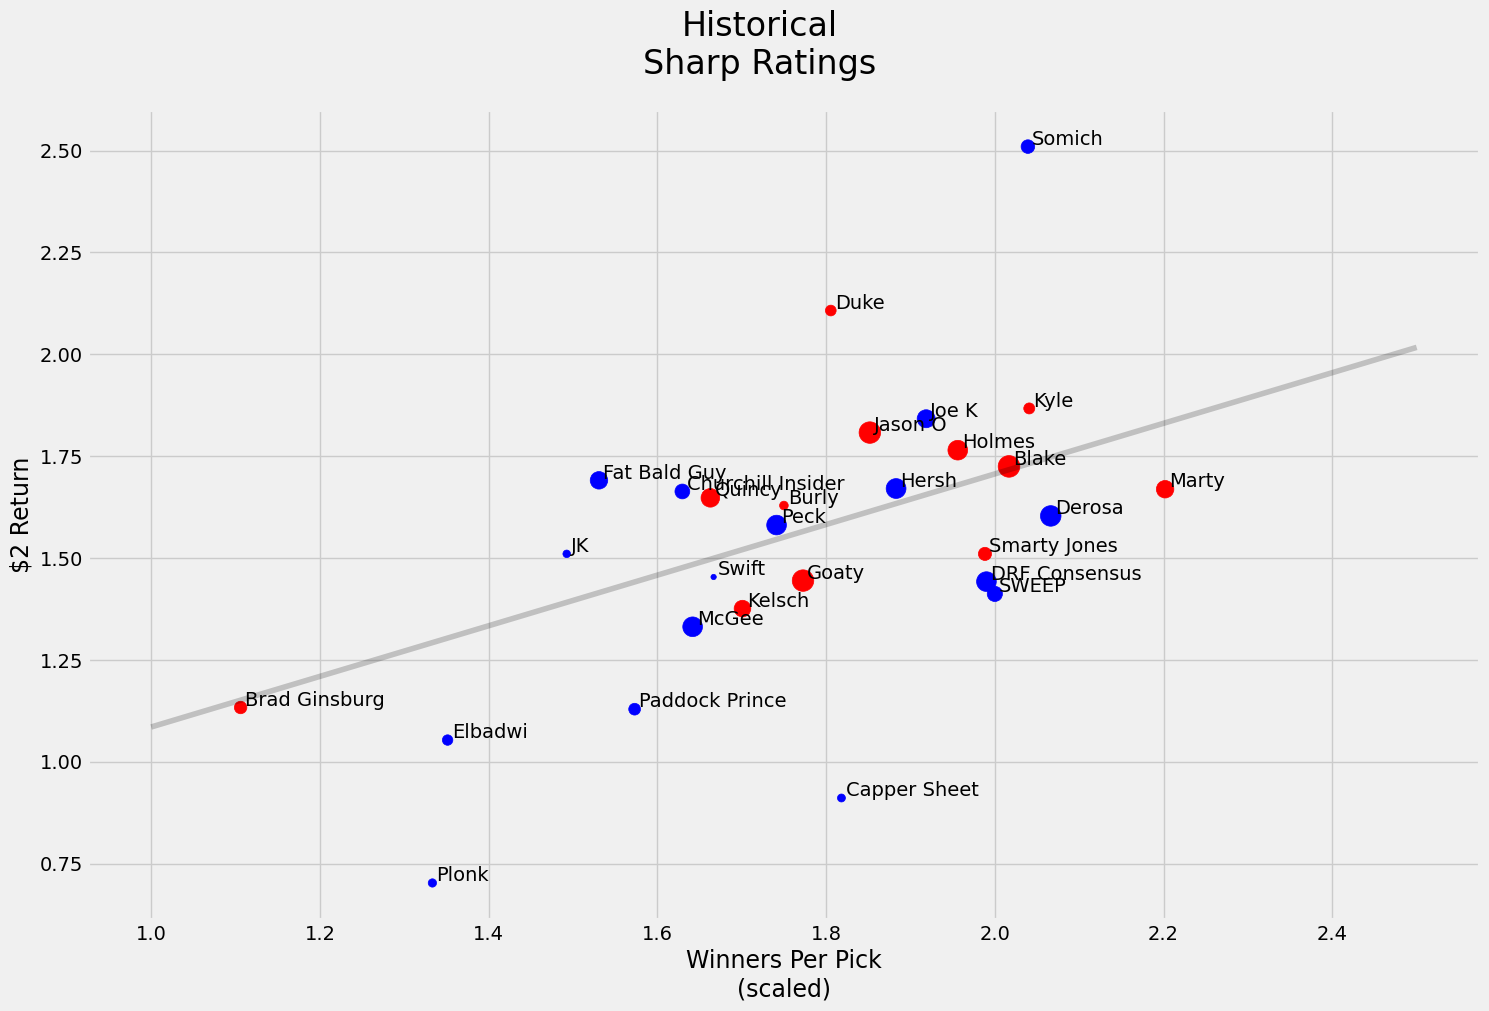

In [13]:


import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(summary['WinPerPick'].values.reshape(-1,1), summary['$2_return'].values.reshape(-1,1), sample_weight=summary['num_races'])
xrange = np.linspace(1, 2.5, 1000).reshape(-1,1)
y = lr.predict(xrange)

plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(16,10))
plt.suptitle("Historical\nSharp Ratings",fontsize=24)
# ax.set_title("(Entire History) ",fontsize=14)
ax.set_xlabel("Winners Per Pick\n(scaled)",fontsize=17)
ax.set_ylabel("$2 Return",fontsize=17)
ax.scatter(summary['WinPerPick'], summary['$2_return'], c=summary['expert'], s=summary['num_races']*3, cmap='bwr_r')
ax.plot(xrange, y, c='k', alpha=0.2)
names = summary['name'].values
for i, txt in enumerate(names):
    ax.annotate(txt, (summary['WinPerPick'].values[i]+0.005, summary['$2_return'].values[i]+0.005), c='k')
    


def getImage(path, zoom=1):
    return OffsetImage(plt.imread(path), zoom=zoom)
# paths = [
#     'a.jpg',
#     'b.jpg',
#     'c.jpg',
#     'd.jpg',
#     'e.jpg']
    
# x = [0,1,2,3,4]
# y = [0,1,2,3,4]
# for x0, y0, path in zip(x, y,paths):
#     ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
#     ax.add_artist(ab)

# x

plt.savefig("C://Users/Blake/Downloads/sharps.png")
plt.show()


